# **1] Data Description**

In this exercise, we'll using the same handwritten digits **MNIST** dataset which we have used for building the Multiclass classification Neural Network.

MNIST(Modified national Institute of standards and Technology database) is a large dataset of 70,000 handwritten digits. It has a training set of 60,000 examples and a test set of 10,000 examples.
There are 10 classes:
  *   Digits from 0 to 9




# **2] Importing the libraries**

In [2]:
# Import the libraries

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# check the Tensroflow and keras versions
print("Tensorflow version ::",tf.__version__)
print("Keras Version ::",tf.keras.__version__)

Tensorflow version :: 2.18.0
Keras Version :: 3.8.0


# **3] Load the dataset**

In [6]:
# Load the MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [7]:
print("Number of training examples :",x_train.shape[0],"and each image is of shape ((%d,%d) i.e pixels)"%(x_train.shape[1],x_train.shape[2]))
print("Number of test examples :",x_test.shape[0], "and each image is of shape ((%d,%d) i.e pixels)"%(x_test.shape[1],x_test.shape[2]))

Number of training examples : 60000 and each image is of shape ((28,28) i.e pixels)
Number of test examples : 10000 and each image is of shape ((28,28) i.e pixels)


In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
# Let's take a look at how one image looks like
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

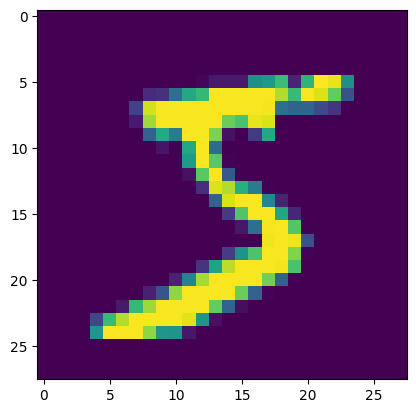

In [9]:
plt.imshow(x_train[0])

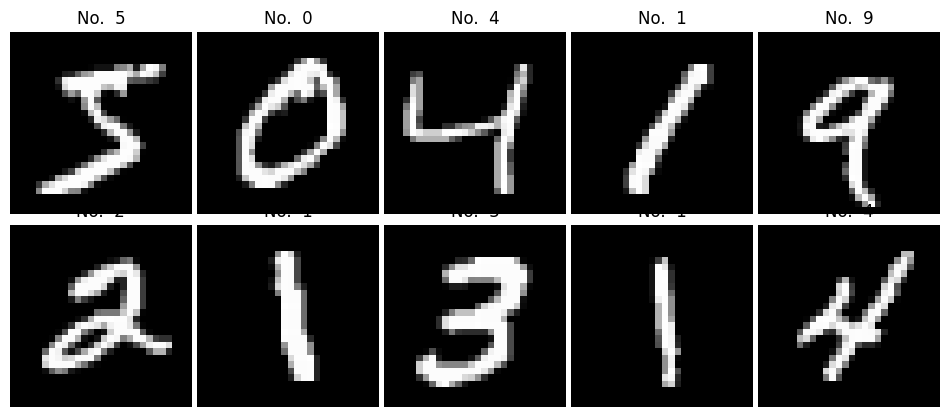

In [10]:
# code to view the images
num_rows,num_cols=2,5

f,ax = plt.subplots(num_rows,num_cols,figsize=(12,5),
                    gridspec_kw={'wspace':0.03,'hspace':0.01},
                    squeeze=True
                    )

for r in range(num_rows):
  for c in range(num_cols):
    image_index = r*5 + c
    ax[r,c].axis('off')
    ax[r,c].imshow(x_train[image_index],cmap="gray")
    ax[r,c].set_title('No.  %d' % y_train[image_index])

plt.show()
plt.close()

# **4] Prepare the Data**

In [12]:
# check the shape of input
x_train.shape

(60000, 28, 28)

# **Observation:**

Here, we can see that each datapoint is 3 dimensional. Where the first value i.e 60000 is the number of records and the second and third value represents each image i.e each image is a 2D vector of shape 28X28.

In most of the supervised learning task like classification and regression in machine learning and deep learning, we use the 2-dimensional data. But, here we have 3-dimensional data so we need to flatten or convert this 3D data to 2D data


# **4.1] Flatten the data to 2D**

In [13]:
# we will convert the 2D vector of (28X28) shape to 1D vector of (1X784) shape

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [14]:
# After flattening the input images, let's check the shape now
print("Number of training examples: ",x_train.shape[0],"and each image is of shape %d" %x_train.shape[1])
print("Number of testing examples:",x_test.shape[0],"and each image is of shape %d" %x_test.shape[1])

Number of training examples:  60000 and each image is of shape 784
Number of testing examples: 10000 and each image is of shape 784


In [15]:
x_train.shape

(60000, 784)

In [16]:
# An example data point
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# **4.2] Normalizing the data**

The pixels values ranges from 0-255 represents the RGB(Red,Green and Blue) color values.

Normalize the values using **Min-Max Scaler.**

Formula is: **X=(X-X_min)/(X_max-X_min) = X/255**

In [17]:
# Normalizing the datapoints within the scale of 0-1 using Min-Max Scaler
x_train = x_train/255
x_test = x_test/255

In [18]:
# Example data point after normalizing
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [19]:
# class labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# **5]Strategies to avoid or control Overfitting/Underfitting:**
  1. Reducing the network size.
  2. Adding weight Regularization.
  3. Adding a Dropout Layer

**5.1]. Reducing the network size**

Let's build multiple neural network with different number of layers and neurons.

In [22]:
# Import Libraries for building sequential models with dense layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [23]:
# Define the input and output dimensions

input_dims = x_train.shape[1]
output_dims=10

# Define the batch size and number of epochs
batch_size=128 # batch_size should always be in the form of 2^n
num_epochs=20

In [25]:
# 1. create an original Model with sufficient layers and neurons
original_model=Sequential()
original_model.add(Dense(32,activation='relu',input_shape=(input_dims,),name='Hidden_Layer1'))
original_model.add(Dense(32,activation='relu',name='Hidden_Layer2'))
original_model.add(Dense(output_dims,activation='softmax',name='output_layer'))

# Compile the neural network
original_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
# Fit or train a neural network
original_classifier=original_model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=num_epochs,verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0421 - val_accuracy: 0.9648 - val_loss: 0.1332
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0437 - val_accuracy: 0.9650 - val_loss: 0.1326
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0415 - val_accuracy: 0.9642 - val_loss: 0.1332
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0379 - val_accuracy: 0.9649 - val_loss: 0.1372
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0355 - val_accuracy: 0.9663 - val_loss: 0.1357
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0305 - val_accuracy: 0.9643 - val_loss: 0.1432
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9924 - loss: 0.0283 - val_accuracy: 0.9630 - val_loss: 0.1489
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0288 - val_accuracy: 0.

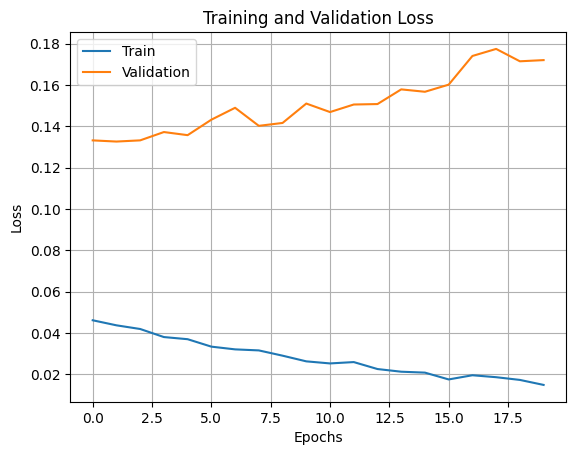

In [30]:
# Plot training loss and validation loss
plt.plot(original_classifier.history['loss'])
plt.plot(original_classifier.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

In [32]:
# 2. Create a Model with low capacity

small_model=Sequential()
small_model.add(Dense(8,activation='relu',input_shape=(input_dims,),name="Hidden_Layer1"))
small_model.add(Dense(8,activation='relu',name="Hidden_Layer2"))
small_model.add(Dense(output_dims,activation='softmax',name='Output_Layer'))

# Compile the Neural Network
small_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit or train a neural network
small_classifier=small_model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=num_epochs,verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4560 - loss: 1.5975 - val_accuracy: 0.8510 - val_loss: 0.5363
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.5089 - val_accuracy: 0.8817 - val_loss: 0.4066
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.4085 - val_accuracy: 0.8954 - val_loss: 0.3644
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8962 - loss: 0.3570 - val_accuracy: 0.9046 - val_loss: 0.3385
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.3374 - val_accuracy: 0.9097 - val_loss: 0.3205
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9090 - loss: 0.3083 - val_accuracy: 0.9143 - val_loss: 0.3057
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9133 - loss: 0.3018 - val_accuracy: 0.9158 - val_loss: 0.2972
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.2896 - val_accuracy: 0.

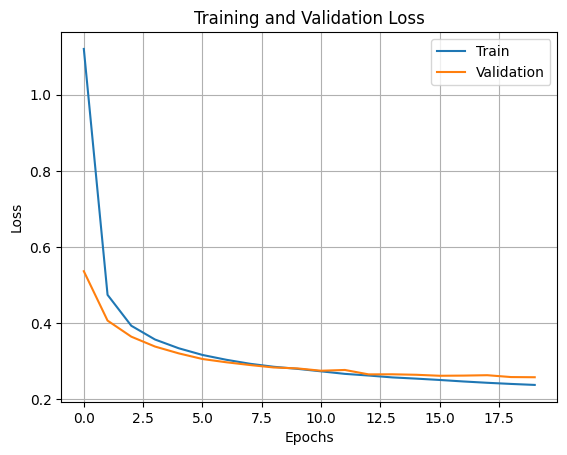

In [33]:
# Plot training loss and validation loss
plt.plot(small_classifier.history['loss'])
plt.plot(small_classifier.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

In [35]:
# Defining the squential model
bigger_model = Sequential()

#Add the  Input layer
#model.add(tf.keras.Input(shape=(input_dims,),name="input_layer"))

#add the first dense layer to the sequential model and the input layer is given to the first dense layer
bigger_model.add(Dense(512,activation='relu',input_shape=(input_dims,),name='Hidden_Layer1'))

# Add the first dense layer to the sequential model
bigger_model.add(Dense(128,activation='relu',name='Hidden_Layer2'))

# Add the ouput Layer
bigger_model.add(Dense(output_dims,activation='softmax',name='output_Layer'))

# Compile the model
bigger_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit a neural network or train a neural network
bigger_classifier = bigger_model.fit(x_train,y_train,validation_split=0.2,epochs=num_epochs,batch_size=batch_size,verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8633 - loss: 0.4815 - val_accuracy: 0.9613 - val_loss: 0.1343
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9692 - loss: 0.1058 - val_accuracy: 0.9695 - val_loss: 0.1014
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9810 - loss: 0.0613 - val_accuracy: 0.9728 - val_loss: 0.0890
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9879 - loss: 0.0420 - val_accuracy: 0.9760 - val_loss: 0.0819
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9911 - loss: 0.0278 - val_accuracy: 0.9722 - val_loss: 0.0964
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9770 - val_loss: 0.0867
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9949 - loss: 0.0157 - val_accuracy: 0.9781 - val_loss: 0.0831
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.

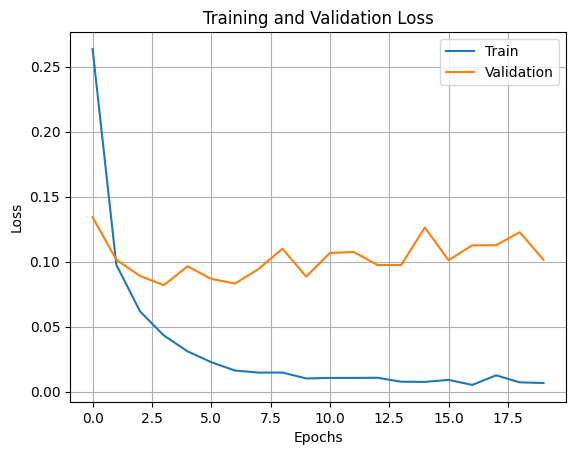

In [36]:
# Plot training loss and validation loss
plt.plot(bigger_classifier.history['loss'])
plt.plot(bigger_classifier.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

# Compare validation loss for all the network

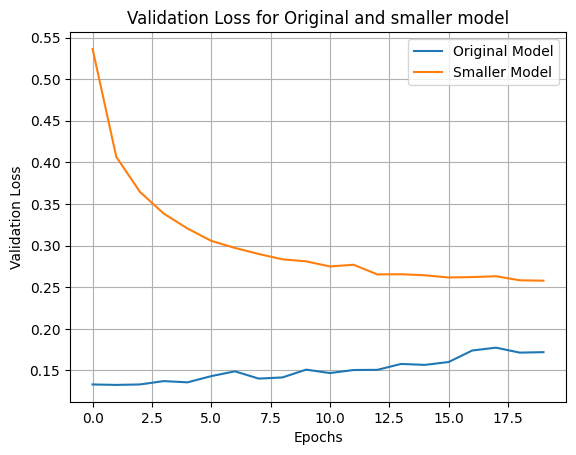

In [37]:
# Plot validation loss for Original and Smaller network model
plt.plot(original_classifier.history['val_loss'])
plt.plot(small_classifier.history['val_loss'])
plt.title('Validation Loss for Original and smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['Original Model','Smaller Model'])
plt.grid()
plt.show()

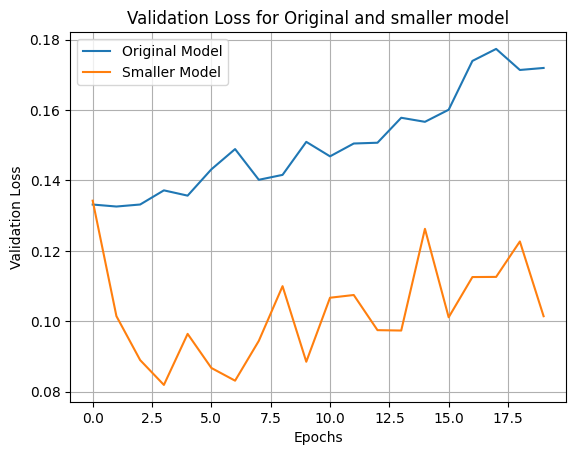

In [38]:
# Plot validation loss for original and Bigger network model
plt.plot(original_classifier.history['val_loss'])
plt.plot(bigger_classifier.history['val_loss'])
plt.title('Validation Loss for Original and smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend(['Original Model','Smaller Model'])
plt.grid()
plt.show()

# **5.2]. Adding weight regularization: L1 and L2 regularization**

A coomon way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more regular. This is called **weight regularization**.

It is done by adding to the loss function of the network a cost associated with having large weights.

This cost comes in two flavors:
 * **L1 regularization:** The cost added is proportional to the absolute value of the weights coefficients(the L1 norm of the weights).

 * **L2 regularization:** The cost added is proportional to the suqare of the weight coefficients(the L2 norm of the weights).


 **L2 regularization is also called weight decay** int the context of neural networks. Don't let the different name confuses you **weight decay is mathematically the same as L2 regularization.**

 In keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.


In [ ]:
# Adding L2 weight regulizer to the original model

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7034 - loss: 1.8110 - val_accuracy: 0.9088 - val_loss: 0.8696
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.8783 - val_accuracy: 0.9150 - val_loss: 0.8084
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9090 - loss: 0.8234 - val_accuracy: 0.9172 - val_loss: 0.7860
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9107 - loss: 0.8025 - val_accuracy: 0.9169 - val_loss: 0.7802
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9109 - loss: 0.7910 - val_accuracy: 0.9198 - val_loss: 0.7691
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9110 - loss: 0.7922 - val_accuracy: 0.9213 - val_loss: 0.7599
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9091 - loss: 0.7841 - val_accuracy: 0.9208 - val_loss: 0.7603
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9116 - loss: 0.7807 - val_accuracy: 0.